<a href="https://colab.research.google.com/github/Gk58IISERTvm98/Supervised_Learning/blob/main/HousePrice2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [59]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

CombData = [train, test]

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### **Adding New Features**

In [60]:
for data in CombData:
  data['TotalFloorArea'] = data['1stFlrSF'] + data['2ndFlrSF']
  data['TotalPorchSf'] = data['OpenPorchSF'] + data['3SsnPorch'] + data['EnclosedPorch']+ data['ScreenPorch'] + data['WoodDeckSF']
  data['BsmtTotalBath'] = data['BsmtFullBath'] + data['BsmtHalfBath']
  data['AvGTotalBath'] = data['FullBath'] + data['HalfBath']
  data['TotalBath'] = data['BsmtTotalBath'] + data['AvGTotalBath']
  data['RemodYears'] = data['YearRemodAdd'] - data['YearBuilt']

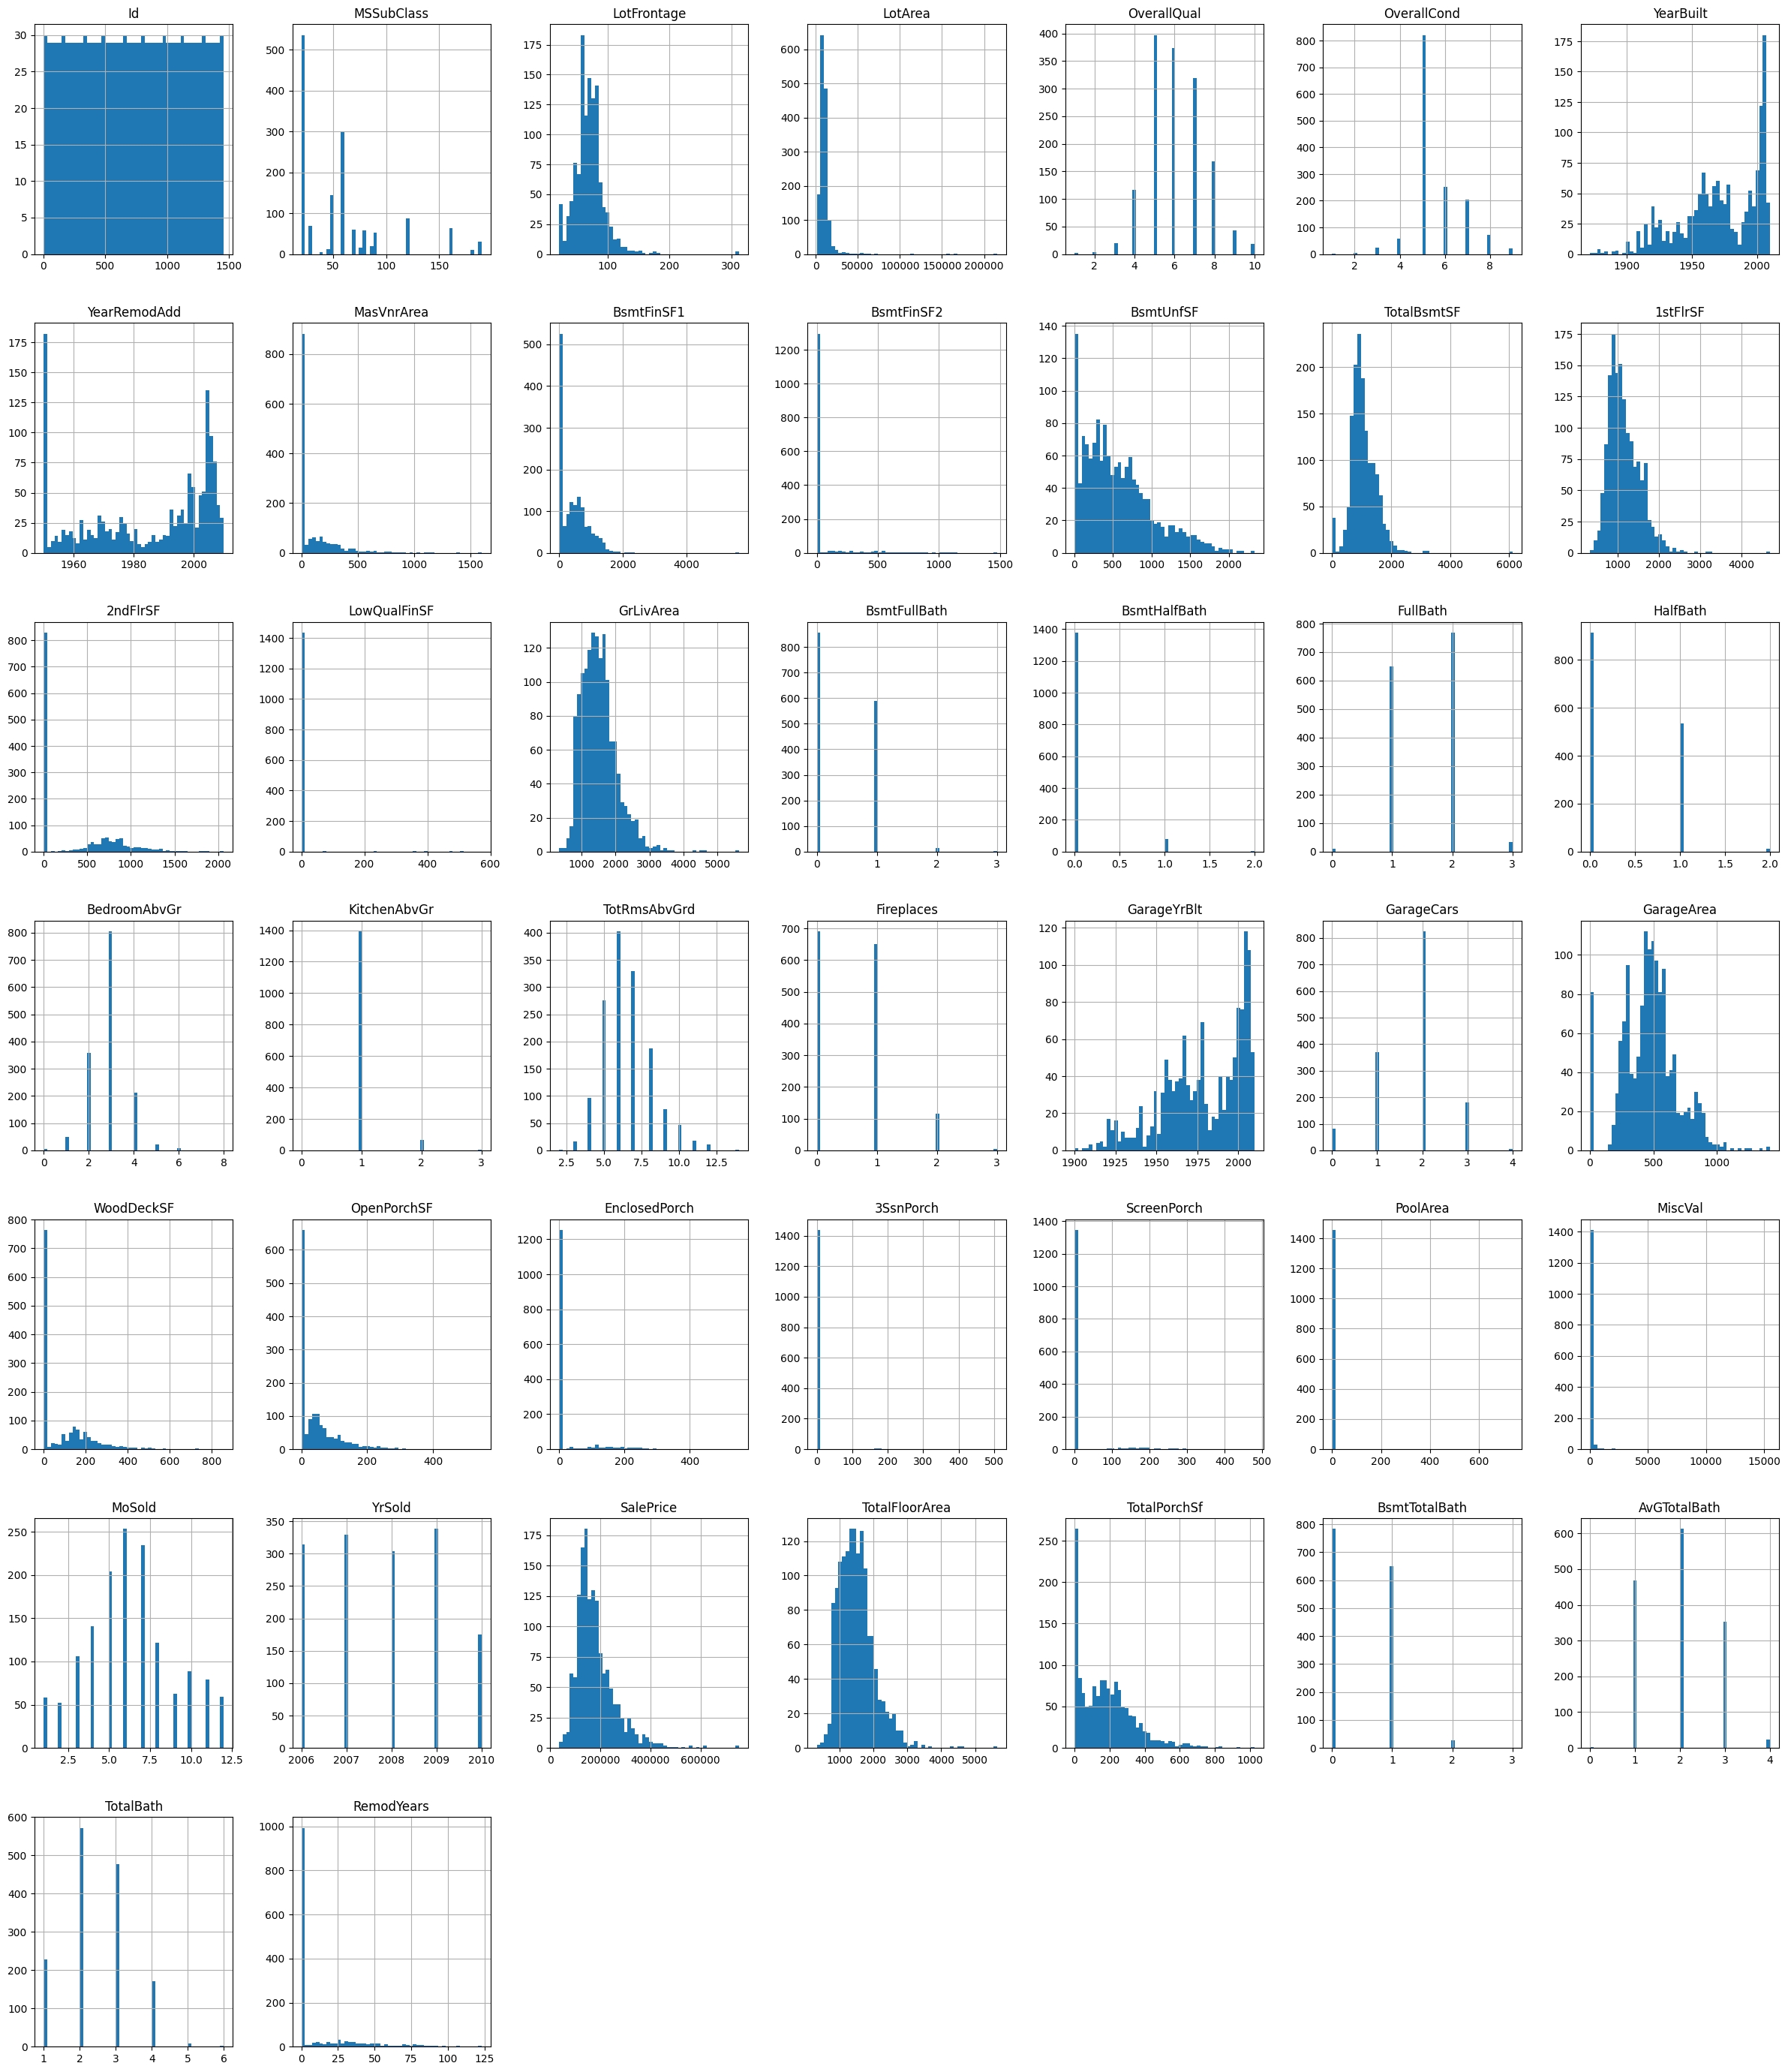

In [5]:
train.hist(bins=50, figsize=(30,35))
plt.show()

We can drop those Columns with constant values provide no useful information , increase dimensonality for training and can negatively impact model performance by introducing noise, slowing down training, and leading to overfitting.

In [61]:
testid = test['Id']

drop_columns1 = ['Id','EnclosedPorch','3SsnPorch','BsmtHalfBath','HalfBath','ScreenPorch','PoolArea',
'LowQualFinSF','2ndFlrSF','MiscVal','KitchenAbvGr','BsmtFullBath','BsmtFinSF2']

for data in CombData:
  data.drop(drop_columns1, axis=1, inplace=True)

### **One Hot Encoding**

In [62]:
cat_column1 = ['MSZoning','Utilities','LotShape','LandContour','LandSlope','BldgType','LotConfig',
'Functional','Electrical','Fence','Alley','Street','RoofStyle','RoofMatl','ExterQual','ExterCond',
'PavedDrive','PoolQC']

cat_column2 = ['GarageCond','GarageQual','GarageFinish','GarageType','BsmtFinType2','BsmtFinType1',
'BsmtExposure','BsmtCond','BsmtQual','Heating','HeatingQC','MiscFeature','SaleCondition','SaleType',
'FireplaceQu']

cat_column3 = ['MSSubClass','Condition1','Condition2','KitchenQual','Foundation','MasVnrType','Exterior2nd',
'Exterior1st','Neighborhood','HouseStyle','OverallQual','OverallCond']


In [63]:
import math
import matplotlib.pyplot as plt


def plot_categorical_columns(data, cat_column,n_cols =4, figsize = (12, 21)):
  n_rows = math.ceil(len(cat_column) / n_cols)
  fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
  axes = axes.flatten()

  for col in cat_column:
    if data[col].dtype in ['float64', 'int64']:
      data[col] = data[col].astype('object')
    data.loc[data[col].isnull(), col] = 'NA'

  for i, col in enumerate(cat_column):
    data[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Bar Plot of {col}')
    axes[i].set_xlabel('Category')
    axes[i].set_ylabel('Count')
    for p in axes[i].patches:
      axes[i].annotate(f'{int(p.get_height())}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', color = 'red',
                        xytext=(0, 7), textcoords='offset points')

  for j in range(i + 1, len(axes)):
      fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()


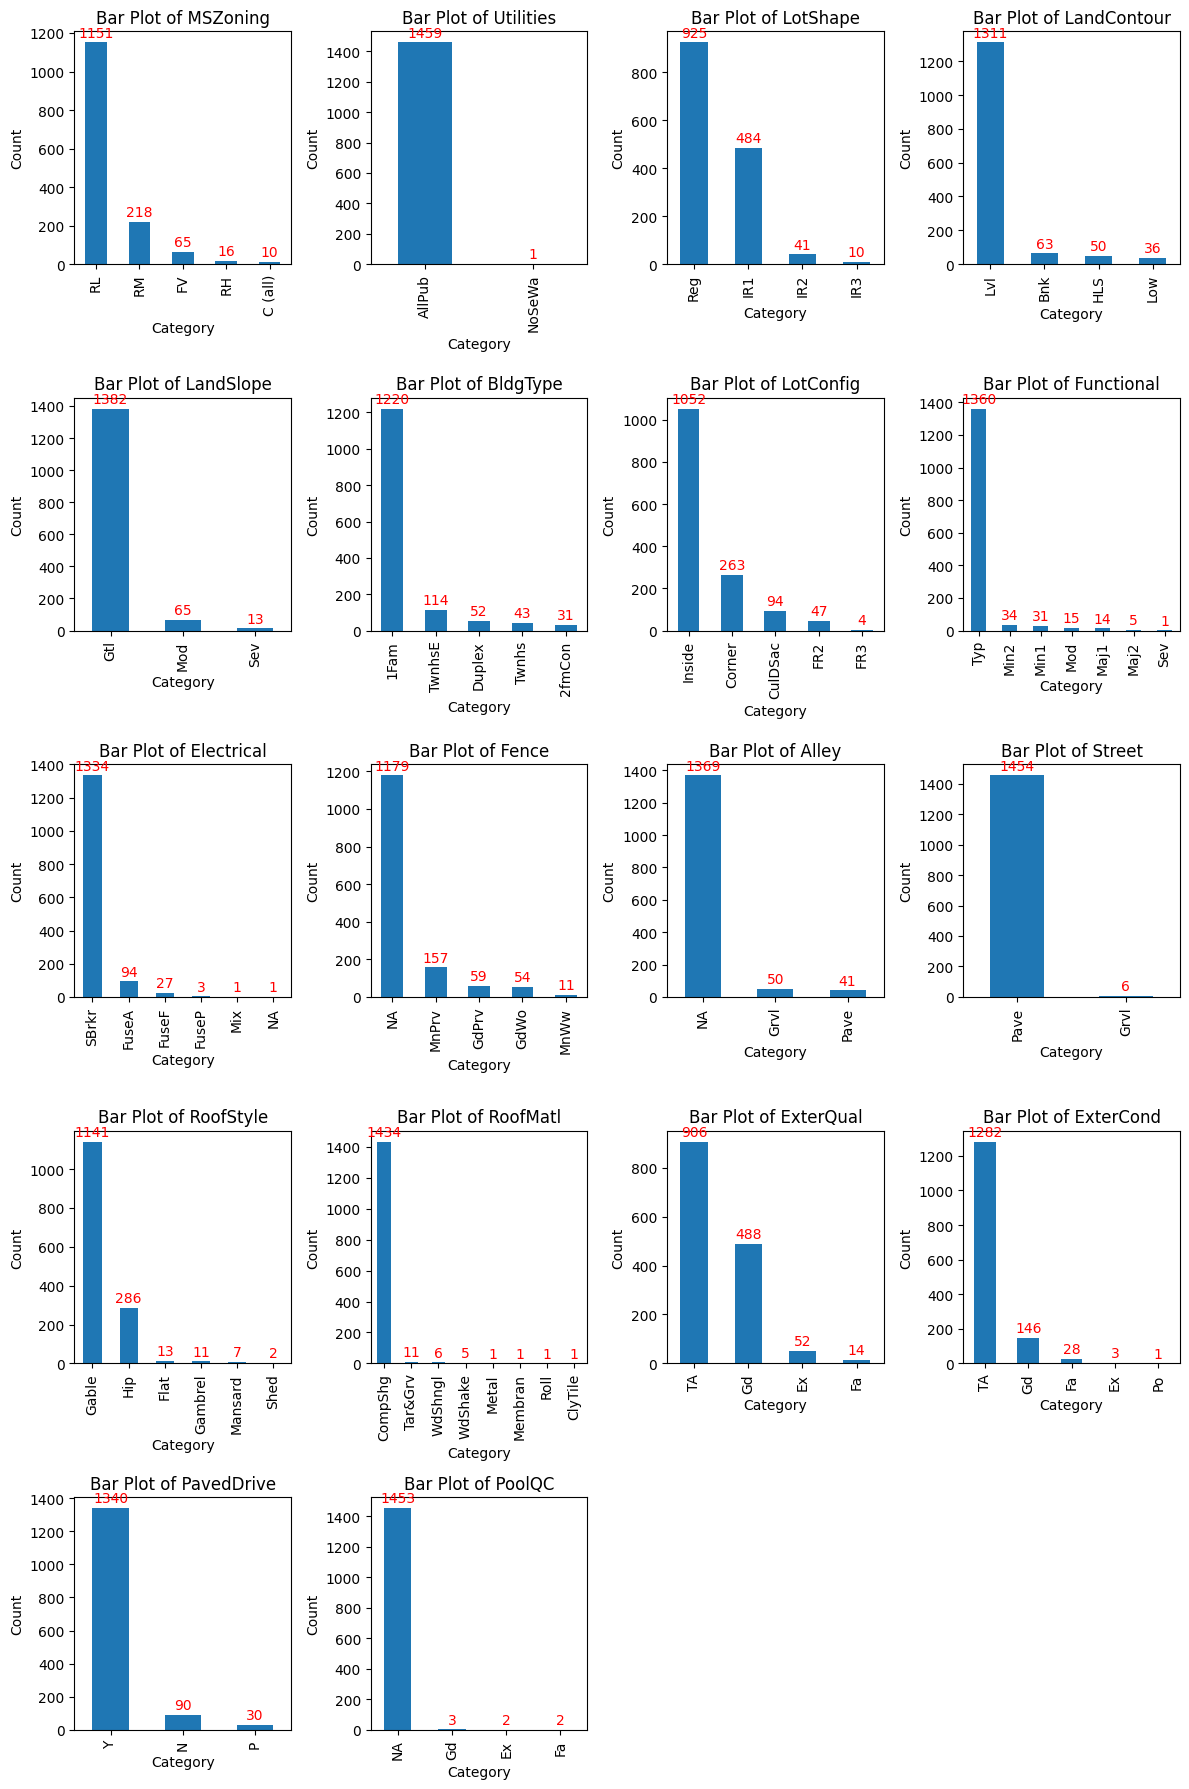

In [9]:
plot_categorical_columns(train, cat_column1,n_cols =4, figsize = (12, 18))

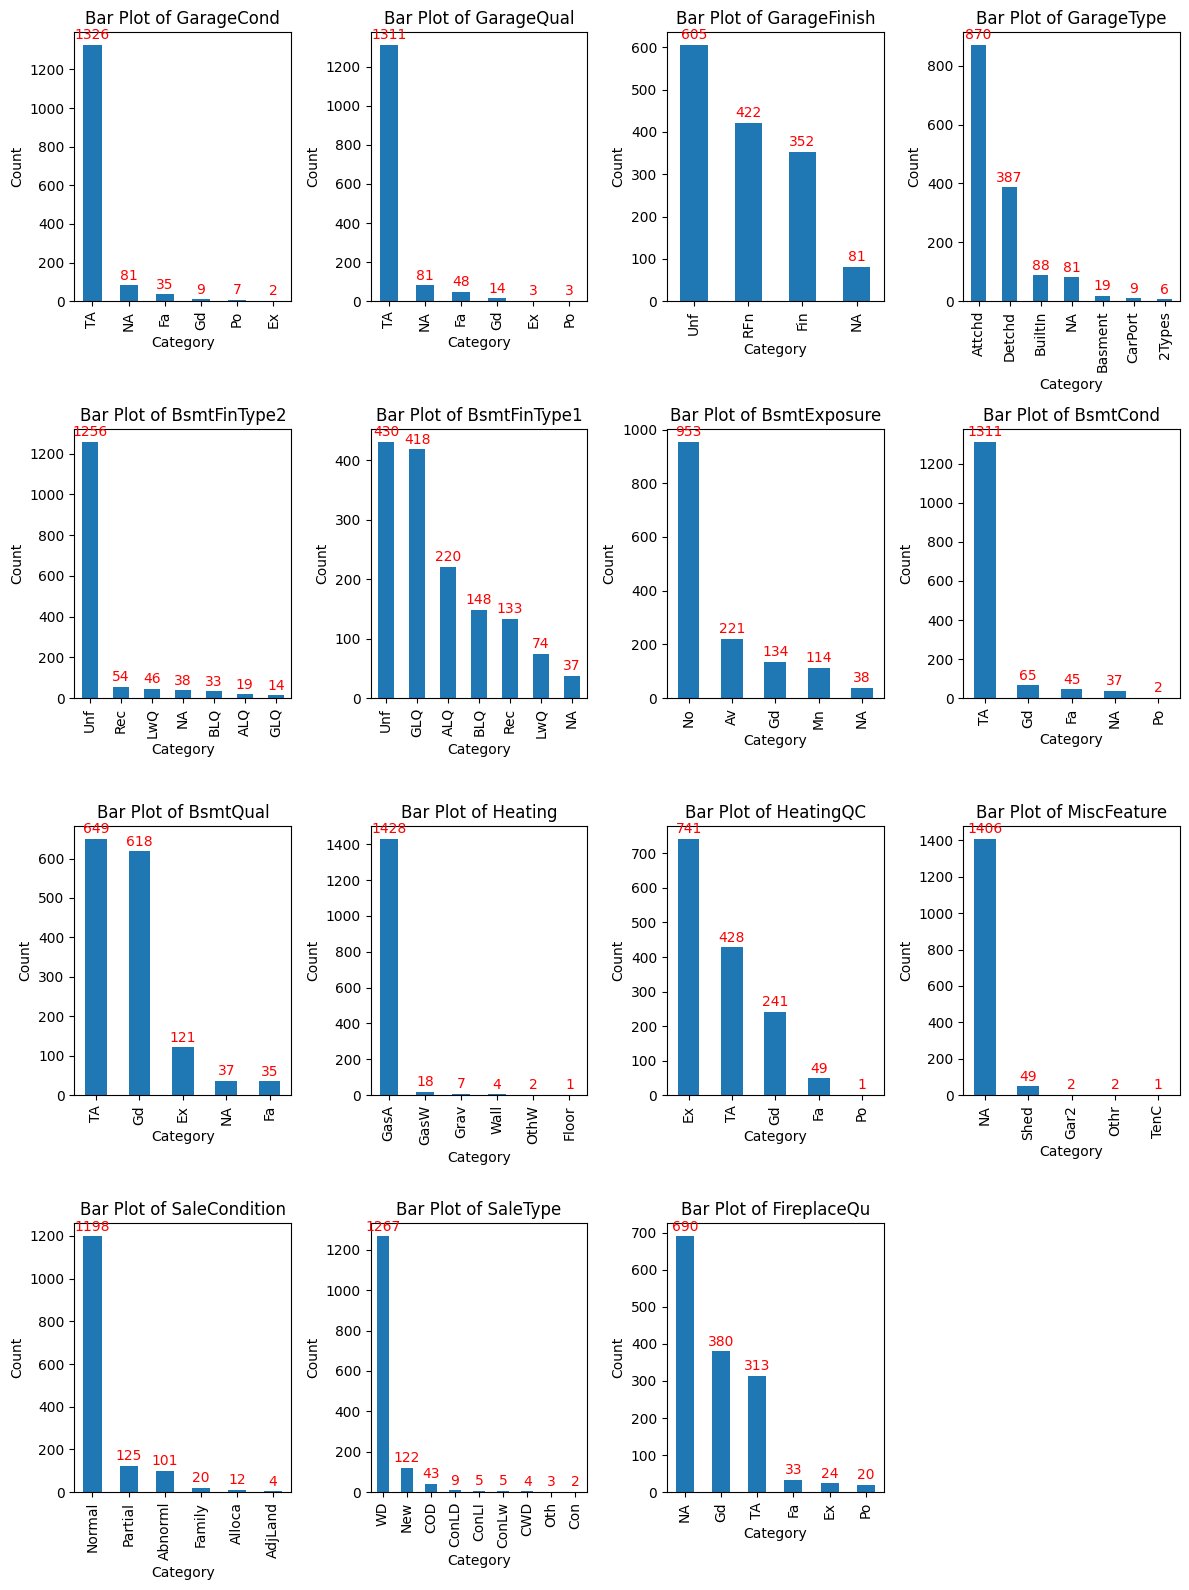

In [10]:
plot_categorical_columns(train,cat_column2,n_cols =4, figsize = (12, 16))

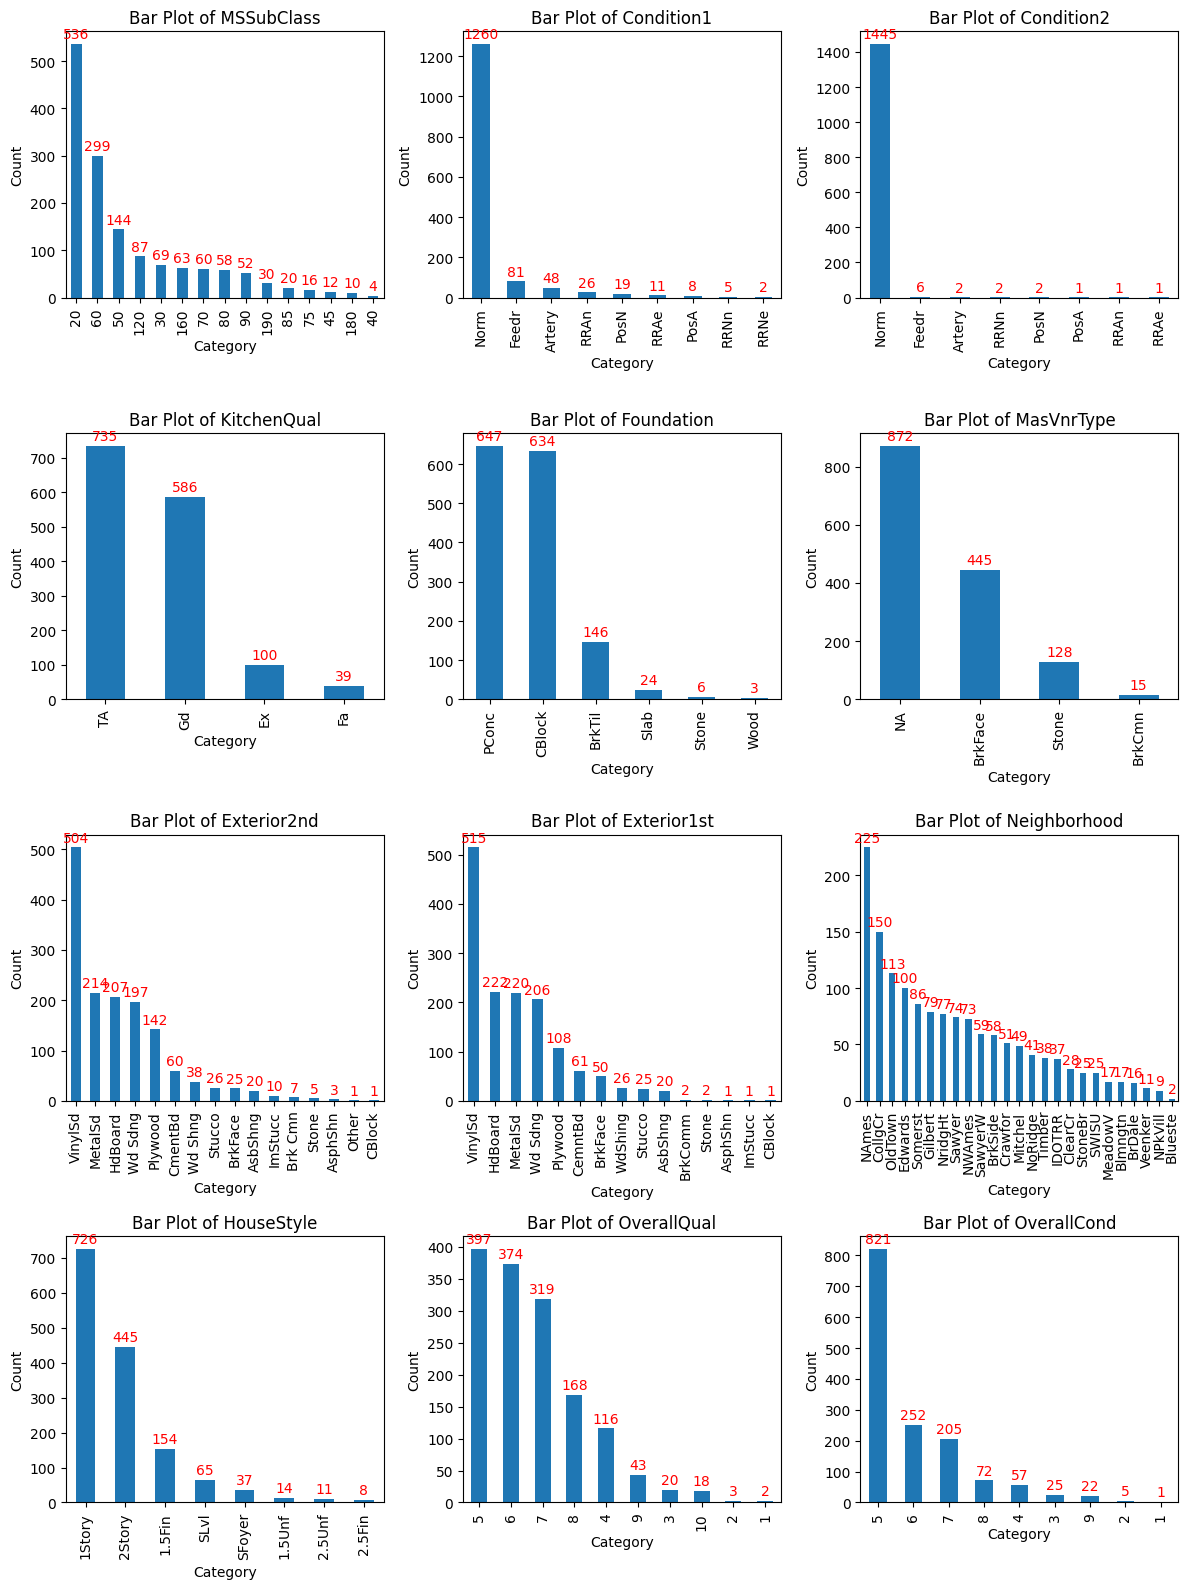

In [11]:
plot_categorical_columns(train,cat_column3,n_cols =3, figsize = (12, 16))

In [64]:
drop_columns2 = ['SaleType','Condition1','Condition2','Heating','MiscFeature','GarageCond','GarageQual',
'BsmtCond','BsmtFinType2','PoolQC','PavedDrive','RoofMatl','ExterCond','Alley','Street','Electrical',
'MSZoning','Utilities','LandContour','Functional','LandSlope','BldgType','Fence','MasVnrType','BsmtExposure',
'LotConfig','OverallCond','Exterior1st','FireplaceQu','ExterCond','RoofStyle']

for data in CombData:
  data.drop(drop_columns2, axis=1, inplace=True)

In [65]:
HouseStyle = {'1Story':1.0,'2Story':2.0,'1.5Fin':3.0,'SLvl':3.0,'SFoyer':3.0,'1.5Unf':3.0,'2.5Unf':3.0,'NA':3.0}
OverallQual = {1:4,2:4,3:3,4:4,5:1,6:2,7:3,8:4,9:4,10:3}
LotShape = {'Reg':1.0, 'IR1':2.0, 'IR2':2.0, 'IR3':2.0}
Exterior2nd = {'VinylSd':1, 'MetalSd':2, 'HdBoard':3, 'Wd Sdng':4, 'Plywood':5, 'CmentBd':5,
       'Wd Shng':4, 'Stucco':3, 'BrkFace':2, 'AsbShng':5, 'ImStucc':2, 'Brk Cmn':3,
       'Stone':4, 'AsphShn':1, 'Other':1, 'CBlock':1}
Neighborhood = {'NAmes':1, 'CollgCr':2, 'OldTown':3, 'Edwards':4, 'Somerst':1, 'Gilbert':2,
       'NridgHt':3, 'Sawyer':4, 'NWAmes':1, 'SawyerW':2, 'BrkSide':3, 'Crawfor':4,
       'Mitchel':1, 'NoRidge':2, 'Timber':3, 'IDOTRR':4, 'ClearCr':1, 'StoneBr':2, 'SWISU':3,
       'MeadowV':4, 'Blmngtn':1, 'BrDale':2, 'Veenker':3, 'NPkVill':4, 'Blueste':4}
MSSubClass = {20:1, 60:2, 50:3, 120:3, 30:1, 160:2, 70:3, 80:2, 90:3, 190:1, 85:1, 75:2, 45:3, 180:2, 40:1}
Foundation = {'BrkTil':3, 'CBlock':2, 'PConc':1, 'Slab':3, 'Stone':3, 'Wood':3}
KitchenQual = {'TA':1, 'Gd':2, 'Ex':2, 'Fa':1}

GarageFinish = {'Unf':1, 'RFn':2, 'Fin':3,'NA':3}
GarageType = {'Attchd':1, 'Detchd':2, 'BuiltIn':3, 'Basment':3, 'CarPort':3, '2Types':3, 'NA':3}
BsmtFinType1 = {'Unf':1, 'GLQ':2, 'ALQ':3, 'BLQ':3, 'Rec':1, 'LwQ':2, 'NA':2}
BsmtQual = {'TA':1, 'Gd':2, 'Ex':3, 'Fa':3,'NA':3}
HeatingQC = {'TA':2, 'Gd':3, 'Ex':1, 'Fa':3,'NA':3}
ExterQual = {'TA':1, 'Gd':2, 'Ex':2, 'Fa':2}
CentralAir = {'N':1, 'Y':2}
# SaleType = {'WD':1, 'New':2, 'COD':2, 'ConLD':2, 'ConLI':2, 'ConLw':2, 'CWD':2, 'Oth':2, 'Con':2}
SaleCondition = {'Normal':1, 'Abnorml':2, 'Partial':2, 'AdjLand':2, 'Alloca':2, 'Family':2}

OneHotEn_col = ['HouseStyle','OverallQual','LotShape','Exterior2nd','Neighborhood','MSSubClass','Foundation',
'KitchenQual','GarageFinish','GarageType','BsmtFinType1','BsmtQual','HeatingQC','ExterQual','CentralAir',
'SaleCondition']


In [66]:
OneHotEn = [HouseStyle,OverallQual,LotShape,Exterior2nd,Neighborhood,MSSubClass,Foundation,KitchenQual,
            GarageFinish,GarageType,BsmtFinType1,BsmtQual,HeatingQC,ExterQual,CentralAir,SaleCondition]

for col, mapping in zip(OneHotEn_col, OneHotEn):
  train[col] = train[col].map(mapping)
  train[col] = train[col].fillna(2).astype(int)


In [67]:
for col, mapping in zip(OneHotEn_col, OneHotEn):
  test[col] = test[col].map(mapping)
  test[col] = test[col].fillna(2).astype(int)

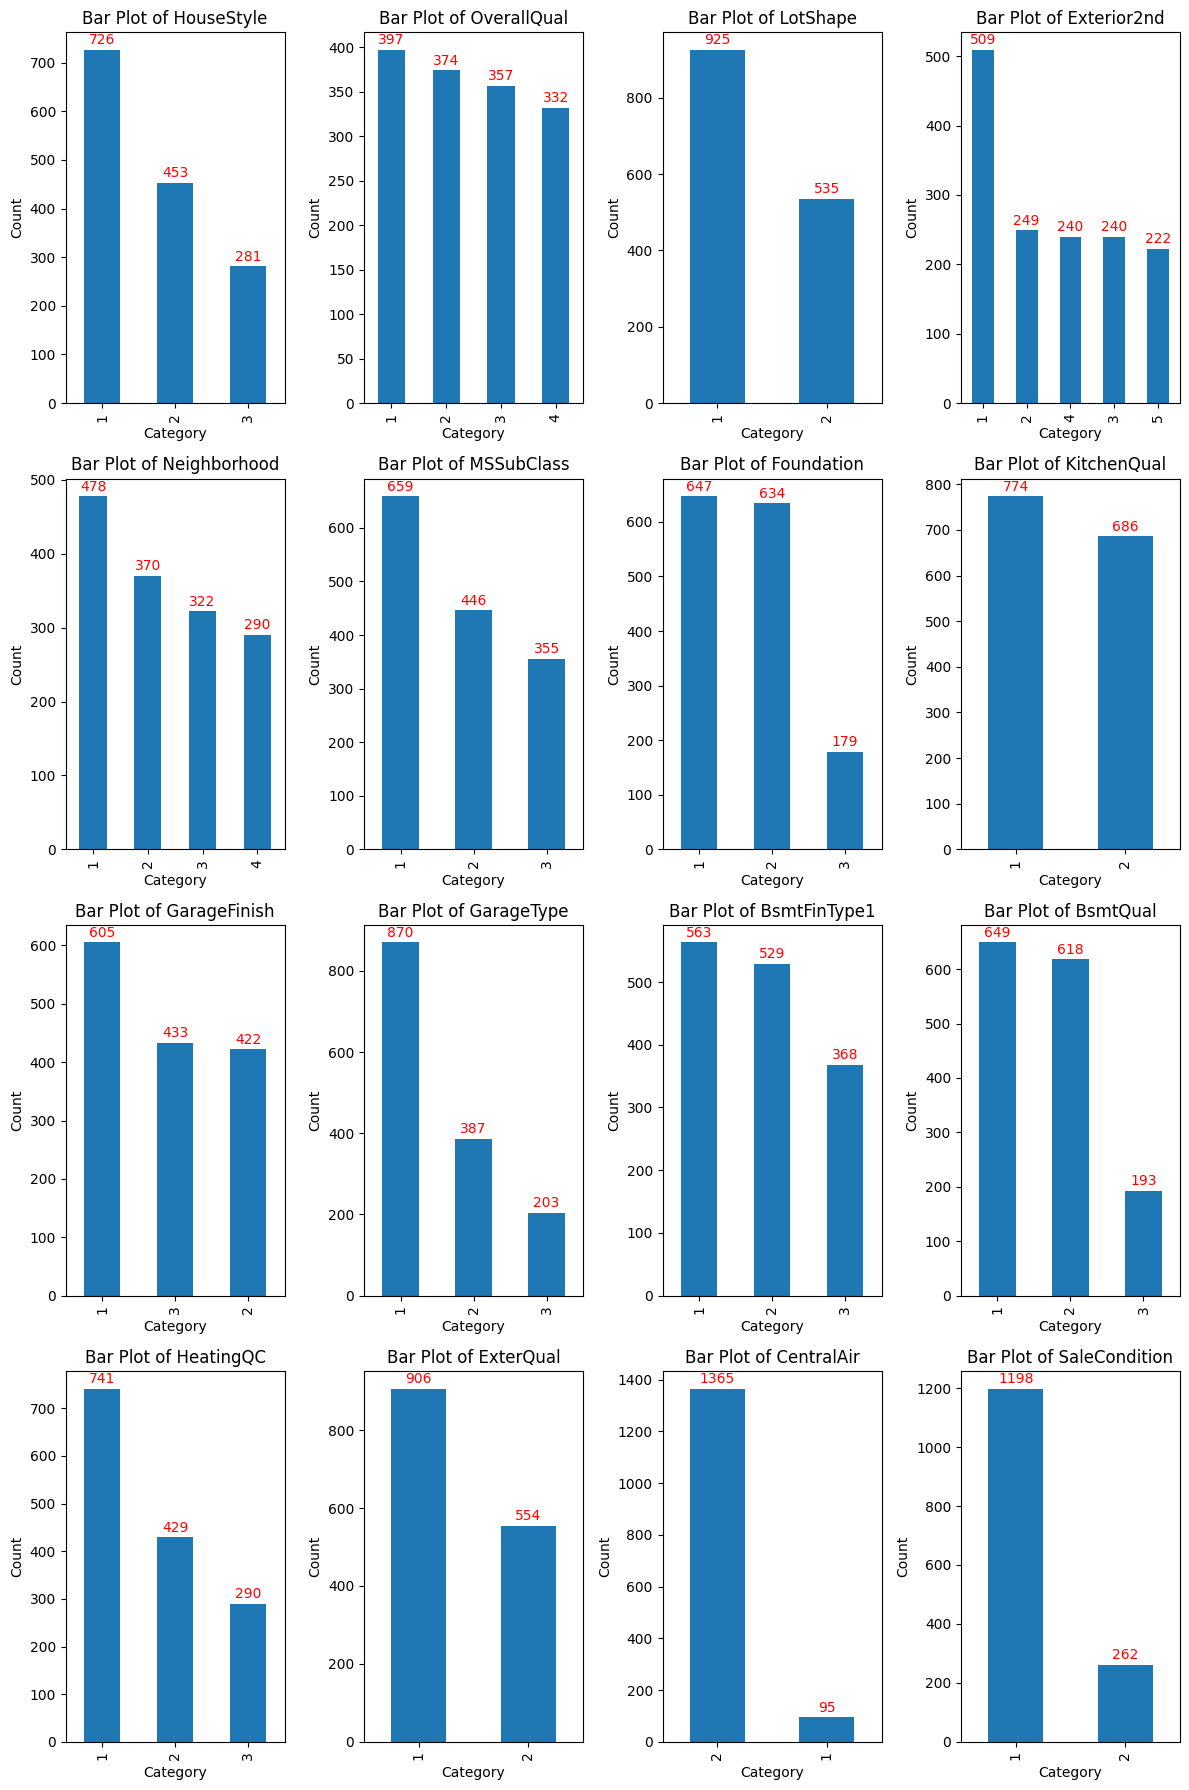

In [15]:
plot_categorical_columns(train, OneHotEn_col,n_cols =4, figsize = (12, 18))

In [68]:
drop_columns3 = ['MoSold','YrSold','RemodYears','BedroomAbvGr','YearBuilt','YearRemodAdd','Foundation',
                 'HouseStyle','GarageType']

for data in CombData:
  data.drop(drop_columns3, axis=1, inplace=True)

In [17]:
numeric_housing = train.select_dtypes(include=[np.number])
corr_matrix = numeric_housing.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

,SalePrice
SalePrice,1.000000
TotalFloorArea,0.716883
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
TotalBath,0.613005
1stFlrSF,0.605852
AvGTotalBath,0.568267
FullBath,0.560664


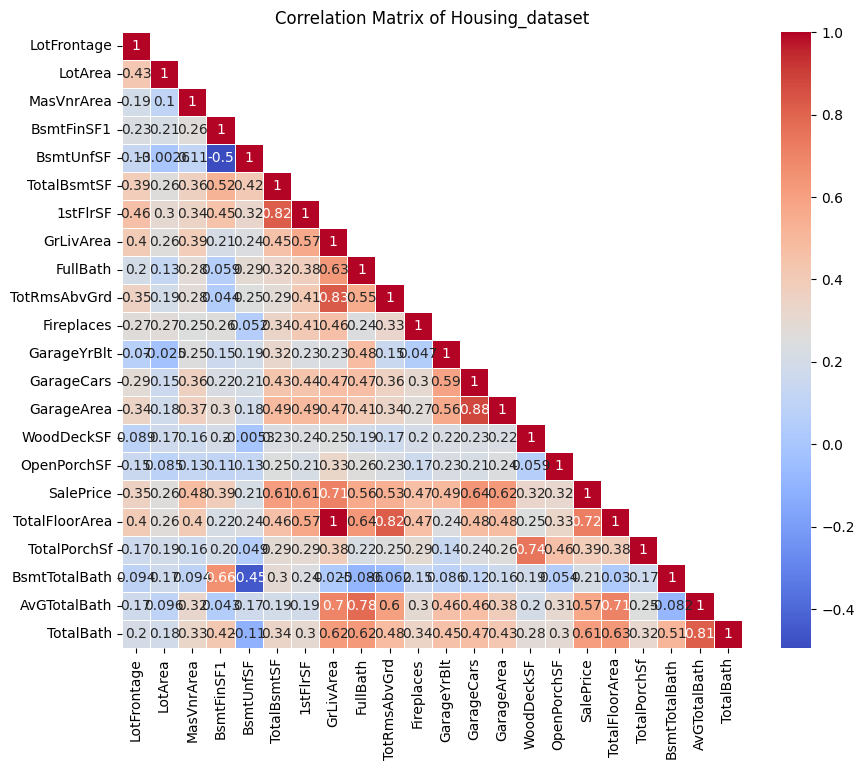

In [18]:
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
sns.heatmap(corr_matrix, mask = mask,annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Housing_dataset')
plt.show()

#### **Removing Missing data with Suitable Values**

In [44]:
lotfrontage = train.select_dtypes(include=[np.number])
corr_matrix = lotfrontage.corr()
corr_matrix["LotFrontage"].sort_values(ascending=False)

,LotFrontage
LotFrontage,1.000000
1stFlrSF,0.457181
LotArea,0.426095
TotalFloorArea,0.403280
GrLivArea,0.402797
TotalBsmtSF,0.392075
TotRmsAbvGrd,0.352096
SalePrice,0.351799
GarageArea,0.344997
GarageCars,0.285691


In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


corrCol_Lotfrontage = ['1stFlrSF', 'LotArea', 'TotalFloorArea','GrLivArea','SalePrice']

train_data = train.dropna(subset=['LotFrontage'])
missing_data = train[train['LotFrontage'].isnull()]

X_train = train_data[corrCol_Lotfrontage]
y_train = train_data['LotFrontage']

model = LinearRegression()
model.fit(X_train, y_train)

X_missing = missing_data[corrCol_Lotfrontage]
predicted_lotfrontage = model.predict(X_missing)


train.loc[train['LotFrontage'].isnull(), 'LotFrontage'] = predicted_lotfrontage



In [70]:
corrCol_Lotfrontage2 = ['1stFlrSF', 'LotArea', 'TotalFloorArea','GrLivArea']

test_data = test.dropna(subset=['LotFrontage'])
missing_data = test[test['LotFrontage'].isnull()]

X_test = test_data[corrCol_Lotfrontage2]
y_test = test_data['LotFrontage']

model = LinearRegression()
model.fit(X_test, y_test)

X_miss = missing_data[corrCol_Lotfrontage2]
predicted_lotfrontage = model.predict(X_miss)

test.loc[test['LotFrontage'].isnull(), 'LotFrontage'] = predicted_lotfrontage



In [71]:
def fillMissingData(data):
  for col in data.columns:
    if data[col].isnull().sum() > 0:
      if pd.api.types.is_numeric_dtype(data[col]):
        data[col].fillna(data[col].median(), inplace=True)
      else:
        data[col].fillna(data[col].mode()[0], inplace=True)

for data in CombData:
  fillMissingData(data)

In [72]:
numerical_columns = ['LotArea', 'GrLivArea', 'GarageArea', 'LotFrontage', 'MasVnrArea','TotalFloorArea',
'WoodDeckSF', 'OpenPorchSF', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF','TotalPorchSf']

for data in CombData:
  for col in numerical_columns:
    mean_value = data[col][data[col] != 0].mean()
    data[col] = data[col].replace(0, mean_value)



In [49]:
train.describe()

,MSSubClass,LotFrontage,LotArea,LotShape,Neighborhood,OverallQual,Exterior2nd,MasVnrArea,ExterQual,BsmtQual,...,GarageArea,WoodDeckSF,OpenPorchSF,SaleCondition,SalePrice,TotalFloorArea,TotalPorchSf,BsmtTotalBath,AvGTotalBath,TotalBath
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1.791781,70.650005,10516.828082,1.366438,2.290411,2.427397,2.600685,254.739425,1.379452,1.662329,...,500.762146,196.848355,84.731343,1.179452,180921.195890,1509.619178,219.519900,0.482877,1.947945,2.430822
std,0.807225,23.451878,9981.264932,0.481996,1.122047,1.115442,1.476385,130.454044,0.485417,0.661550,...,180.452667,77.674555,51.110049,0.383862,79442.502883,521.163523,132.707698,0.538174,0.794965,0.922647
min,1.000000,21.000000,1300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,160.000000,12.000000,4.000000,1.000000,34900.000000,334.000000,4.000000,0.000000,0.000000,1.000000
25%,1.000000,60.000000,7553.500000,1.000000,1.000000,1.000000,1.000000,254.739425,1.000000,1.000000,...,389.750000,180.000000,56.750000,1.000000,129975.000000,1123.750000,135.750000,0.000000,1.000000,2.000000
50%,2.000000,69.904011,9478.500000,1.000000,2.000000,2.000000,2.000000,254.739425,1.000000,2.000000,...,493.000000,196.848355,84.731343,1.000000,163000.000000,1458.000000,219.519900,0.000000,2.000000,2.000000
75%,2.000000,80.000000,11601.500000,2.000000,3.000000,3.000000,4.000000,254.739425,2.000000,2.000000,...,576.000000,196.848355,84.731343,1.000000,214000.000000,1775.250000,266.000000,1.000000,3.000000,3.000000
max,3.000000,313.000000,215245.000000,2.000000,4.000000,4.000000,5.000000,1600.000000,2.000000,3.000000,...,1418.000000,857.000000,547.000000,2.000000,755000.000000,5642.000000,1027.000000,3.000000,4.000000,6.000000


### **Feature Scalling**

In [25]:
numerical_columns = ['LotArea', 'GrLivArea', 'GarageArea','LotFrontage','MasVnrArea','TotalFloorArea','WoodDeckSF',
                     'OpenPorchSF','TotalPorchSf','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF']

train_fs = train.copy()
test_fs = test.copy()
dataframe = [train_fs, test_fs]

skewness = train_fs[numerical_columns].skew().sort_values(ascending=False)
print(skewness)


LotArea           12.207688
MasVnrArea         3.286063
OpenPorchSF        3.027514
BsmtFinSF1         2.790286
WoodDeckSF         2.335214
LotFrontage        2.322895
TotalBsmtSF        2.199107
1stFlrSF           1.376757
TotalPorchSf       1.373730
GrLivArea          1.366560
TotalFloorArea     1.330470
BsmtUnfSF          1.012362
GarageArea         0.834466
dtype: float64


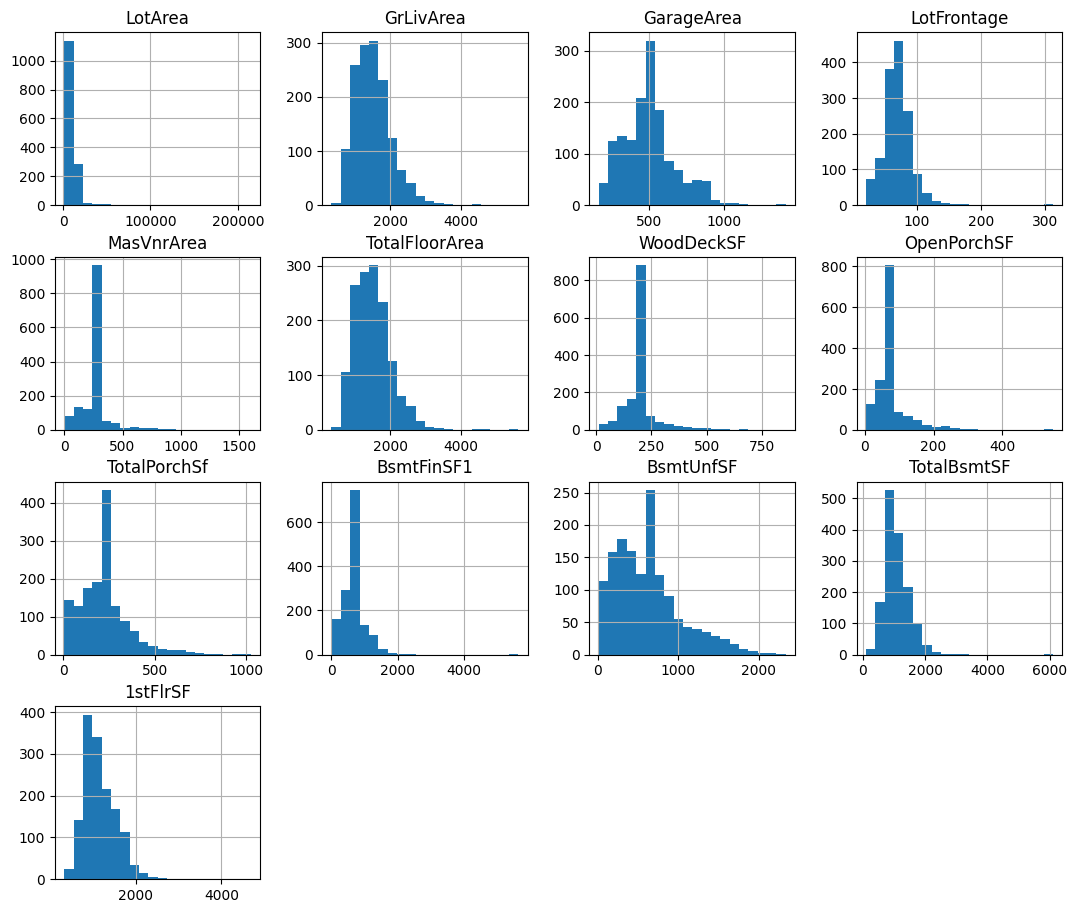

In [26]:

train_fs[numerical_columns].hist(bins=20, figsize=(13, 11))
plt.show()


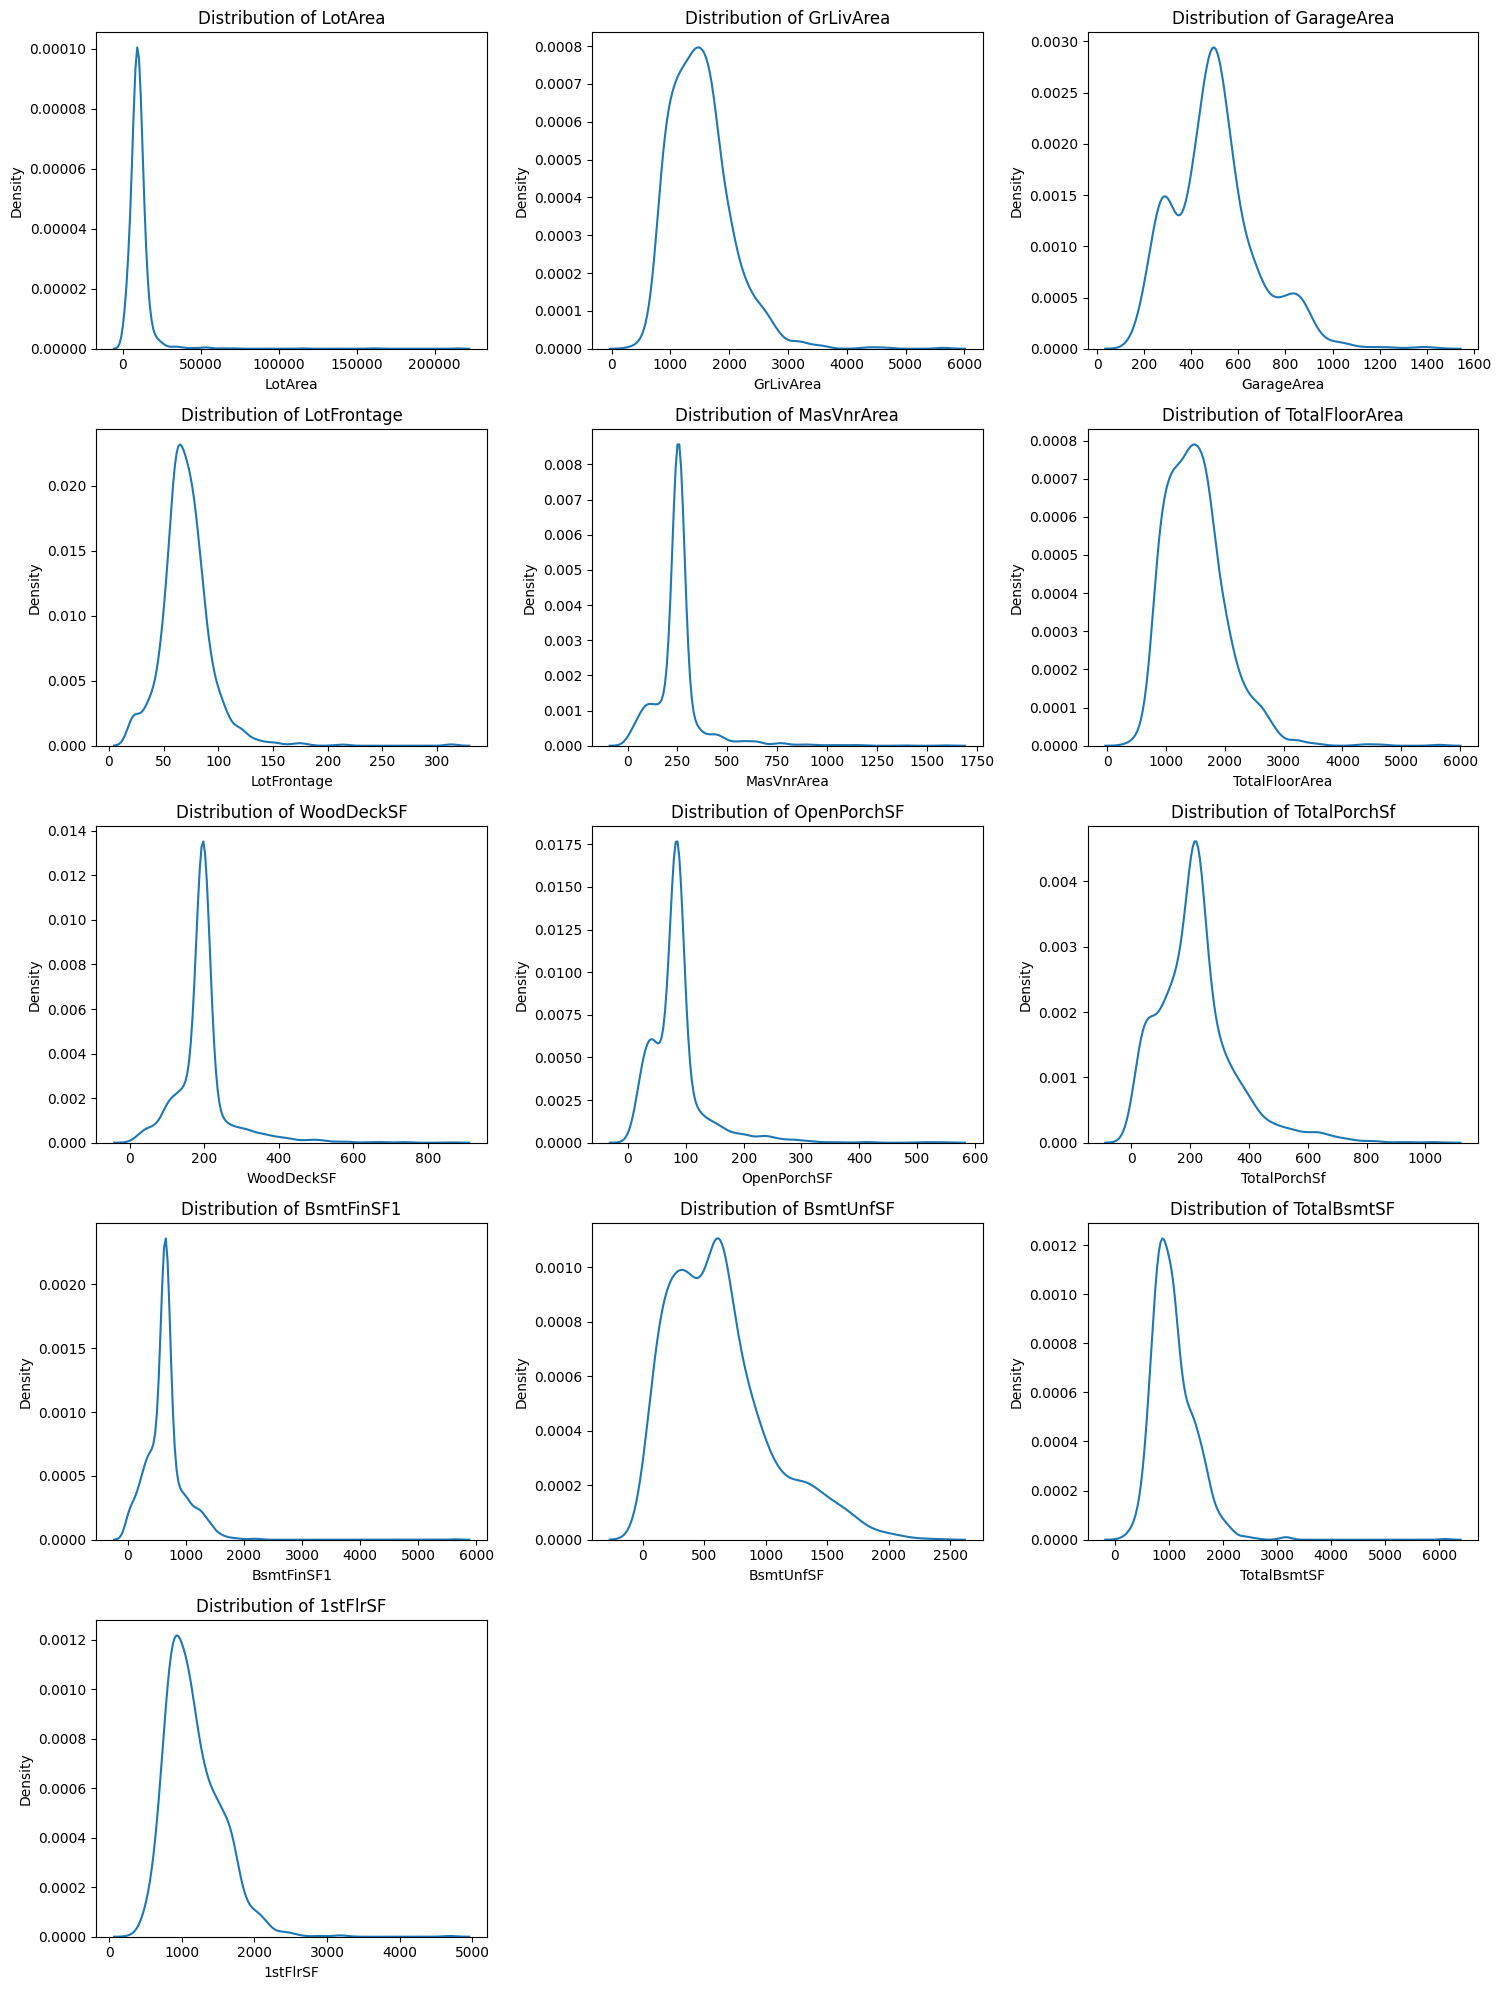

In [27]:
num_cols = 3

num_rows = math.ceil(len(numerical_columns) / num_cols)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()
for i, col in enumerate(numerical_columns):
    sns.kdeplot(train_fs[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()


In [28]:
for col in numerical_columns:
  train_fs[col] = np.log1p(train_fs[col])
  test_fs[col] = np.log1p(test_fs[col])

In [29]:
train_fs.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,TotalFloorArea,TotalPorchSf,BsmtTotalBath,AvGTotalBath,TotalBath
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,4.221368,9.110966,5.420178,6.303085,6.167794,6.927708,7.008452,7.268512,1.565068,6.517808,...,1.767123,6.153134,5.213226,4.308540,180921.195890,7.264729,5.188272,0.482877,1.947945,2.430822
std,0.326241,0.517369,0.564181,0.740174,0.797547,0.356456,0.317431,0.333303,0.550916,1.625393,...,0.747315,0.367076,0.411784,0.545965,79442.502883,0.333612,0.714255,0.538174,0.794965,0.922647
min,3.091042,7.170888,0.693147,1.098612,2.708050,4.663439,5.814131,5.814131,0.000000,2.000000,...,0.000000,5.081404,2.564949,1.609438,34900.000000,5.814131,1.609438,0.000000,0.000000,1.000000
25%,4.110874,8.929898,5.544159,6.196444,5.730902,6.705639,6.783325,7.030415,1.000000,5.000000,...,1.000000,5.968067,5.198497,4.056095,129975.000000,7.025316,4.918149,0.000000,1.000000,2.000000
50%,4.261326,9.156887,5.544159,6.482006,6.378426,6.925595,6.992096,7.289611,2.000000,6.000000,...,2.000000,6.202536,5.287501,4.451218,163000.000000,7.285507,5.395988,0.000000,2.000000,2.000000
75%,4.394449,9.358976,5.544159,6.569832,6.695799,7.169542,7.238676,7.483104,2.000000,7.000000,...,2.000000,6.357842,5.287501,4.451218,214000.000000,7.482260,5.587249,1.000000,3.000000,3.000000
max,5.749393,12.279537,7.378384,8.638525,7.756623,8.717846,8.453827,8.638171,3.000000,14.000000,...,4.000000,7.257708,6.754604,6.306275,755000.000000,8.638171,6.935370,3.000000,4.000000,6.000000


## **Training and Evaluating on the Training Set**

In [73]:
from sklearn.model_selection import train_test_split
import pandas as pd

X = train.drop("SalePrice", axis=1)
y = train["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [31]:
categorical_cols = ['LotShape', 'Neighborhood', 'OverallQual', 'Exterior2nd',
                    'ExterQual','BsmtQual', 'BsmtFinType1', 'HeatingQC',
                    'CentralAir', 'KitchenQual', 'GarageFinish', 'SaleCondition']

In [74]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse = np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [75]:
from xgboost import XGBRegressor
import xgboost as xgb

regressor1 = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468,
                          learning_rate=0.05, max_depth=3,
                          min_child_weight=1.7817, n_estimators=2200,
                          reg_alpha=0.4640, reg_lambda=0.8571,
                          subsample=0.5213
                         )

regressor1.fit(X_train, y_train)
xgb_train_pred = regressor1.predict(X_train)
print('[model] ', 'xgboost:', rmsle(y_train, xgb_train_pred))

[model]  xgboost: 4744.377262392593


In [76]:
xgb_pred = np.round(regressor1.predict(X_test)).astype(int)
print('[model] ', 'xgboost:', rmsle(y_test, xgb_pred))

[model]  xgboost: 27255.413971796


In [80]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

regressor5 = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10,
                                   loss='huber', random_state =5)
regressor5.fit(X_train, y_train)
gbr_train_pred = regressor5.predict(X_train)
# gbr_pred = np.round(regressor5.predict(test_data)).astype(int)
print('[model] ', 'GradientBoosting:', rmsle(y_train, gbr_train_pred))

[model]  GradientBoosting: 11494.429350152406


In [88]:
gbr_pred = np.round(regressor5.predict(X_test)).astype(int)
print('[model] ', 'GradientBoosting:', rmsle(y_test, gbr_pred))

[model]  GradientBoosting: 32977.571493095


In [85]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.preprocessing import RobustScaler

regressor3 = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
regressor3.fit(X_train, y_train)
ENet_train_pred = regressor3.predict(X_train)
print('[model] ', 'ElasticNet:', rmsle(y_train, ENet_train_pred))

[model]  ElasticNet: 36333.566362952944


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.643e+11, tolerance: 7.873e+08
  model = cd_fast.enet_coordinate_descent(


In [87]:
elst_pred = np.round(regressor3.predict(X_test)).astype(int)
print('[model] ', 'ElasticNet:', rmsle(y_test, elst_pred))

[model]  ElasticNet: 41784.93145843728
